In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import inspect

import pandas as pd
import numpy as np

from cls2 import occur, plotting
from cls2.occur import *
from cls2.io import *

In [2]:
objects = pd.read_csv('legacy_tables/planet_list.csv')
trends = pd.read_csv('legacy_tables/trend_list.csv')

objects_real   = objects.query('status != "N" and status != "A" and status != "R"').reset_index(drop=True)
objects_good   = objects_real.query('mass != "nan"').reset_index(drop=True)
planets_s      = objects_good.query('(status == "S" or status == "SS") and mass > 10').reset_index(drop=True)
planets        = objects_good.query('status != "S" and status != "SS"').reset_index(drop=True)
planets_old    = planets.query('status == "K"').reset_index(drop=True)
planets_new    = planets.query('status == "C" or status == "J"').reset_index(drop=True)


samples_all = pd.read_csv('legacy_tables/samples_all_joker.csv').sample(500).reset_index(drop=True)

good_cols = [col for col in samples_all.columns if '_S' in col or '_M' in col]
for col in good_cols:
    # remove 114762 b/c found to be face-on binary Keifer et al. (2019)
    if '114762' in col:
        continue

    if '_M' in col:
        samples_all[col] *= 317.8

        
allbins = lngrid(3e-4, 1000., 30., 6000, 11, 1) 
        
samples_all = samples_all[good_cols]
samples_all

,104067_M1,104067_S1,10697_M1,10697_S1,107148_M1,107148_S1,107148_M2,107148_S2,108874_M1,108874_S1,...,83443_M1,83443_S1,183263_M1,183263_S1,183263_M2,183263_S2,gl876_M1,gl876_S1,gl876_M2,gl876_S2
0,65.771872,4.090164,2029.047126,0.639013,63.466771,9.208172,23.663916,62.586342,423.638904,0.889285,...,127.019478,515.973798,1246.454725,0.656007,2678.629500,0.040887,672.056072,0.312875,221.198417,0.798446
1,63.951550,4.233497,1995.825471,0.747046,67.081143,8.570142,17.820187,58.325607,413.473392,0.996777,...,133.763179,475.771844,1109.881016,0.848912,2422.596332,0.052871,647.795901,0.326691,215.617115,0.833692
2,66.691734,5.239076,1991.299373,0.666783,57.615631,11.607608,19.292692,78.878394,439.136284,0.873502,...,123.676164,552.399822,1146.275363,0.782039,2481.986192,0.049356,639.332303,0.288176,210.642134,0.735380
3,63.006056,4.625481,2132.346936,0.537441,68.210218,9.086631,20.467343,61.840393,417.205823,1.021313,...,128.745344,445.263045,1217.198144,0.701699,2573.799709,0.044535,662.838090,0.336960,214.719536,0.859890
4,66.885606,4.259516,2022.404191,0.682540,68.769468,9.534001,25.355683,64.777955,422.418575,0.979221,...,135.917256,474.336012,1240.061377,0.849098,2648.251537,0.052083,665.951530,0.283039,222.742513,0.722308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,71.516833,4.601704,2000.693924,0.611738,63.048291,11.778574,18.005479,80.079111,399.193713,0.892166,...,127.826031,481.798723,1196.600811,0.698478,2526.161140,0.043893,670.534680,0.254536,219.327912,0.649532
496,63.249599,4.791565,2023.906962,0.658511,54.318503,9.638360,18.267129,65.518373,413.214504,1.037121,...,142.794505,435.755870,1156.225116,0.746776,2497.363214,0.047085,670.694301,0.269587,224.236502,0.687969
497,59.640703,4.500058,1998.168724,0.636210,67.376613,9.921293,21.576927,67.485968,406.069286,0.974329,...,130.889906,473.890048,1162.551013,0.841704,2537.745192,0.051717,676.798591,0.300909,224.916253,0.767884
498,59.717781,4.265305,1941.218442,0.746076,59.380564,10.663931,18.629858,72.501192,439.582722,0.860582,...,125.689755,516.850652,1165.601911,0.794007,2468.173488,0.050591,665.392495,0.282246,222.358617,0.720283


In [3]:
recoveries_all = pd.read_csv('recoveries_all_earth.csv')
completey_all  = Completeness(recoveries_all, xcol='inj_insol')

In [4]:
hierarchical_one = Insol(samples_all, completey_all, bins=allbins)

In [5]:
hierarchical_one.max_like()

0.0003000000000000001 0.0011751958024123332 30.000000000000004 5999.999999999995 1
0.0011751958024123332 0.004603617246691891 30.000000000000004 5999.999999999995 4
0.004603617246691891 0.018033838880751118 30.000000000000004 5999.999999999995 9
0.018033838880751118 0.07064430584679679 30.000000000000004 5999.999999999995 17
0.07064430584679679 0.27673630565162866 30.000000000000004 5999.999999999995 21
0.27673630565162866 1.0840644825896355 30.000000000000004 5999.999999999995 31
1.0840644825896355 4.246626764945453 30.000000000000004 5999.999999999995 14
4.246626764945453 16.635393161919215 30.000000000000004 5999.999999999995 14
16.635393161919215 65.16614738455435 30.000000000000004 5999.999999999995 6
65.16614738455435 255.27660955237207 30.000000000000004 5999.999999999995 3
255.27660955237207 999.9999999999998 30.000000000000004 5999.999999999995 12


In [6]:
hierarchical_one.sample(parallel=False, gp=False)

100%|██████████| 1000/1000 [49:15<00:00,  2.96s/it]


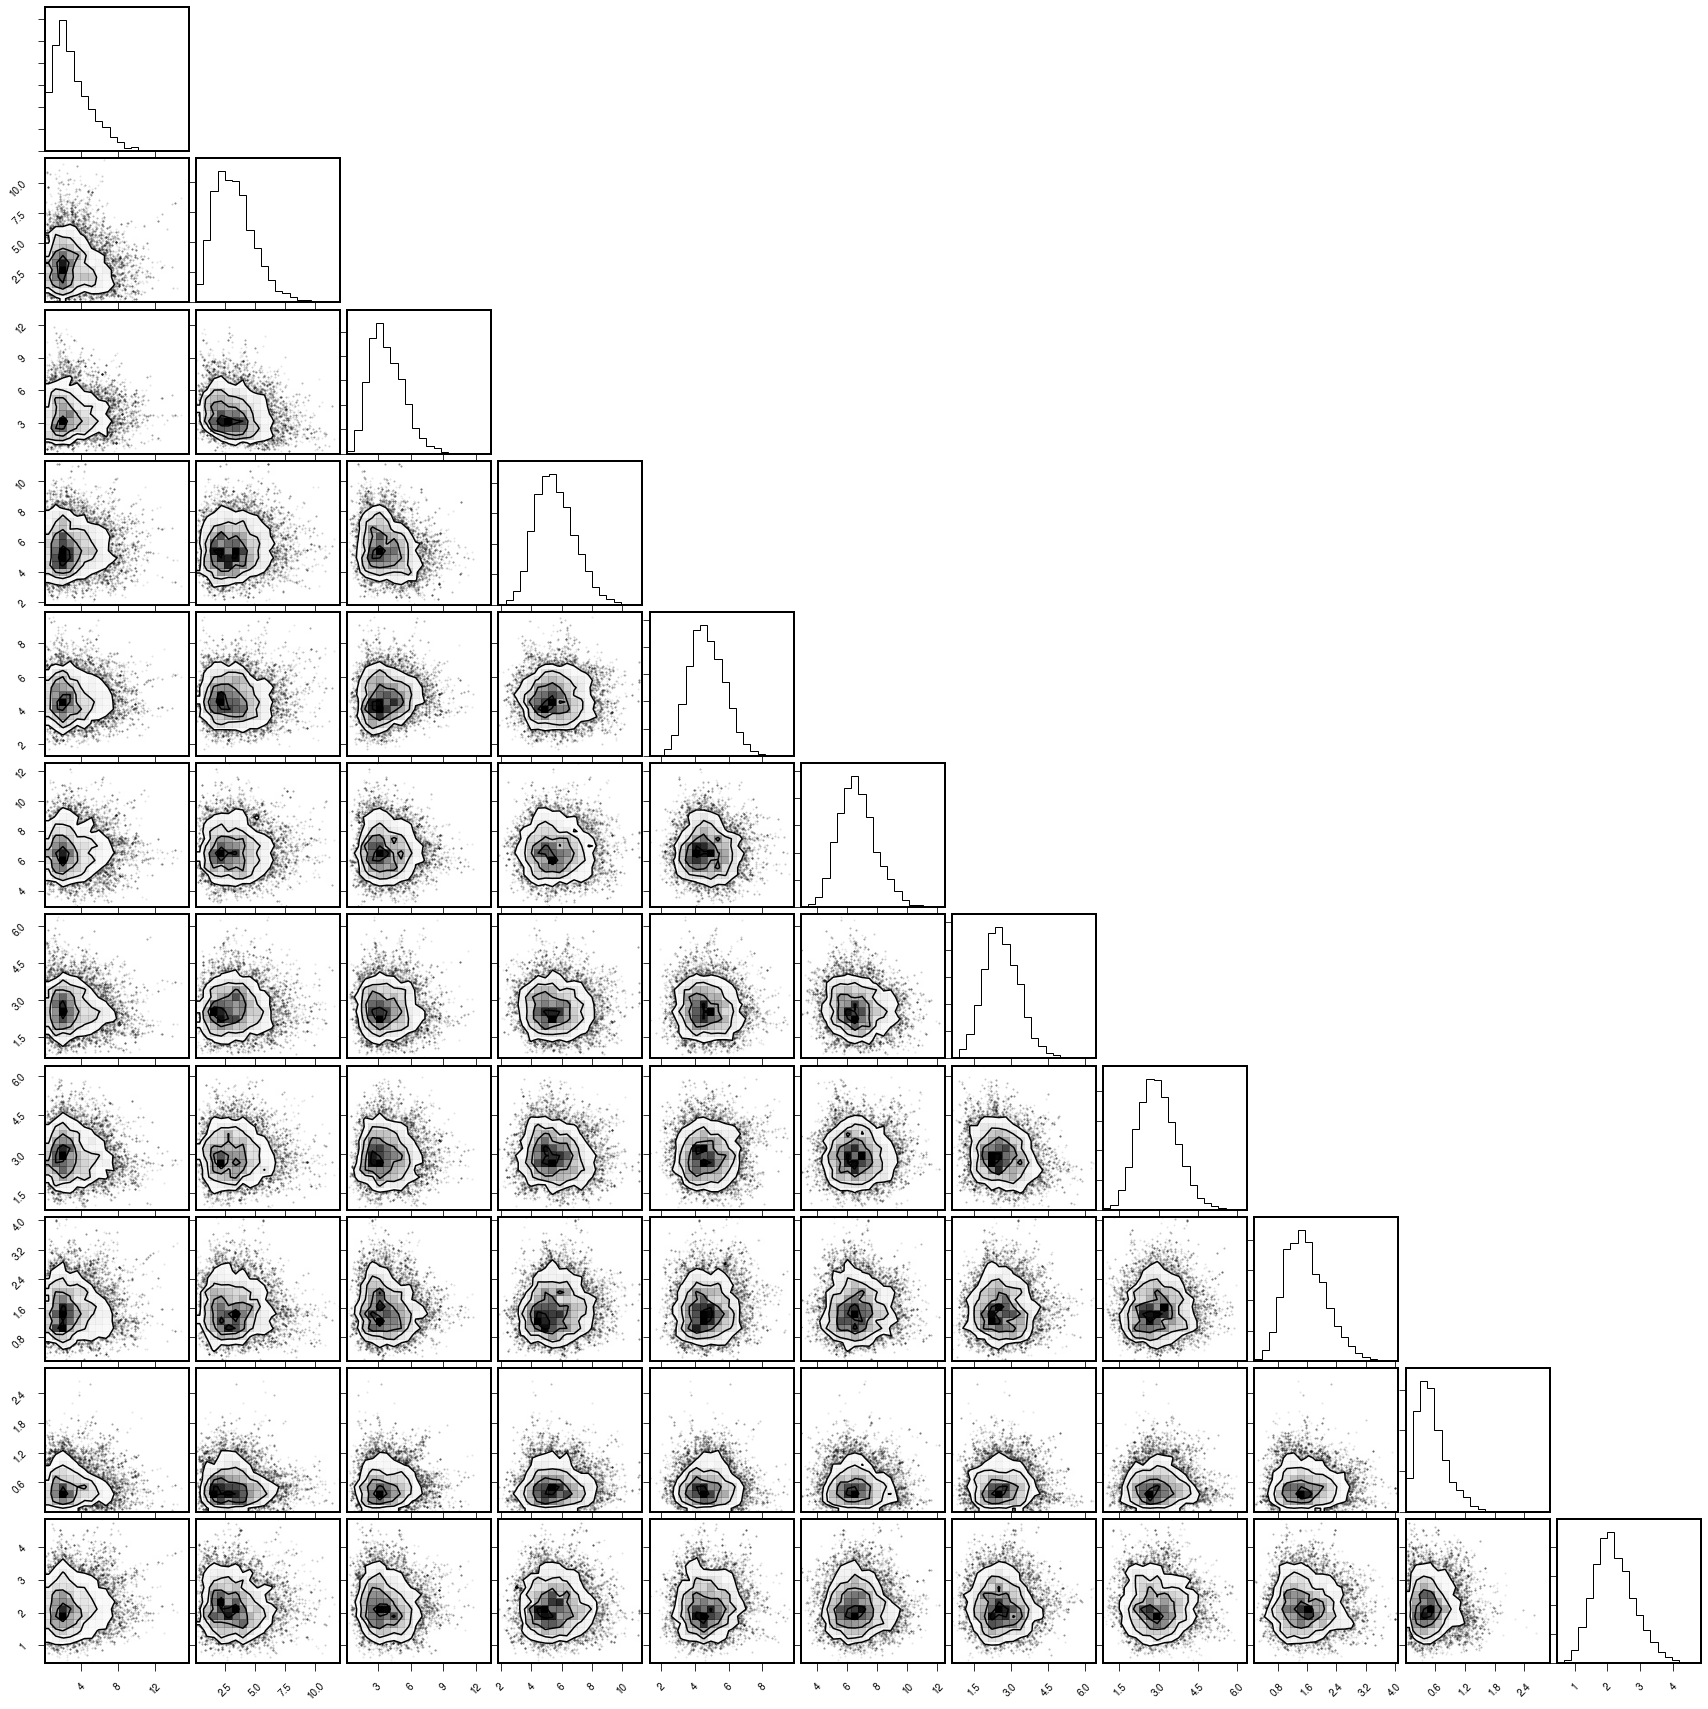

In [7]:
fig = corner.corner(hierarchical_one.chains[10000:]*hierarchical_one.bin_areas[0][0]*(100/719))
fig.savefig('plots/corner_11x1_insol.pdf')

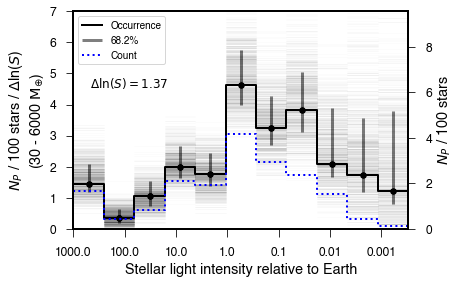

In [8]:
plotting.insol_hist(planets, allbins, hierarchical_one,
                     outname='plots/hist_11x1_insol.pdf', chainfile='insol_chains.csv')